# Iris Flower Classification

#### Import the libraries

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
# Load the Dataset
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
dataset.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
len(dataset)

150

In [46]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


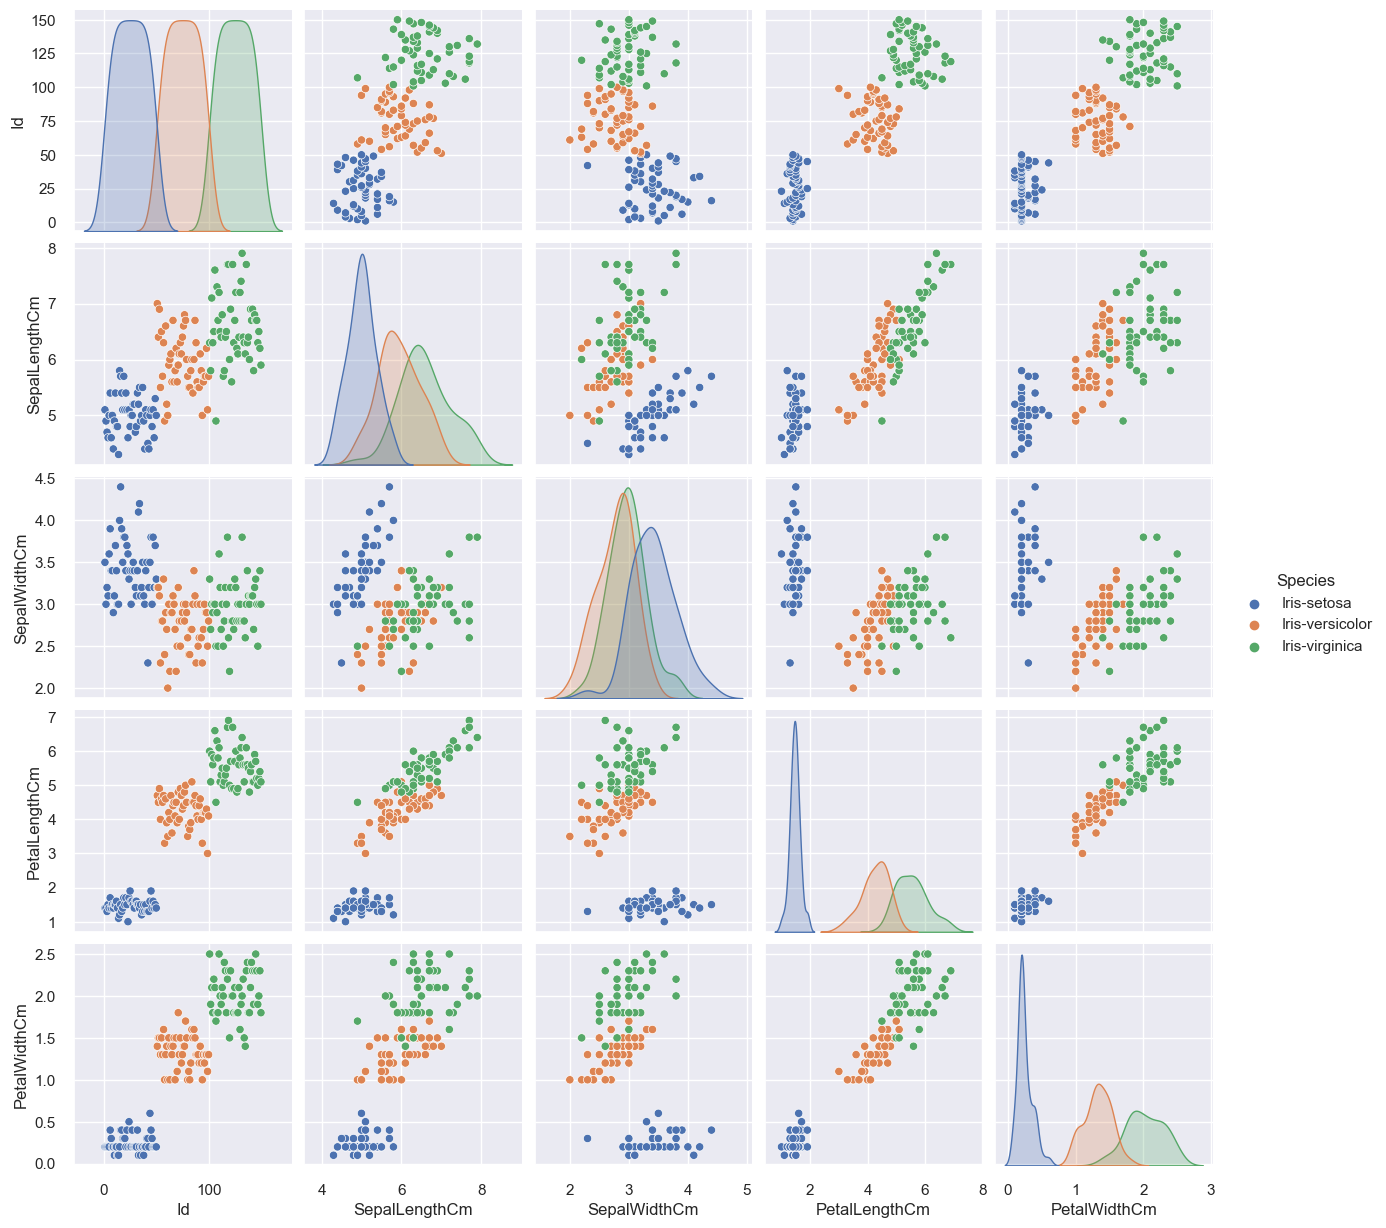

In [64]:
# Visualize the dataset
plt.style.use('seaborn-v0_8')
sns.set(font_scale=6.5)
sns.set(rc={'figure.figsize': (11, 8)})
sns.pairplot(dataset, hue="Species");

In [49]:
# Adding Features and Target column
x = dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]] 
y = dataset[["Species"]] #target

In [50]:
# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
# Use KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=3)

In [52]:
# Fit the classifier on the training data
knn.fit(x_train, y_train)

C:\Users\FARAZ\Desktop\internship\oasis\env\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [53]:
# Predicting the testing data
y_pred = knn.predict(x_test)

In [54]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


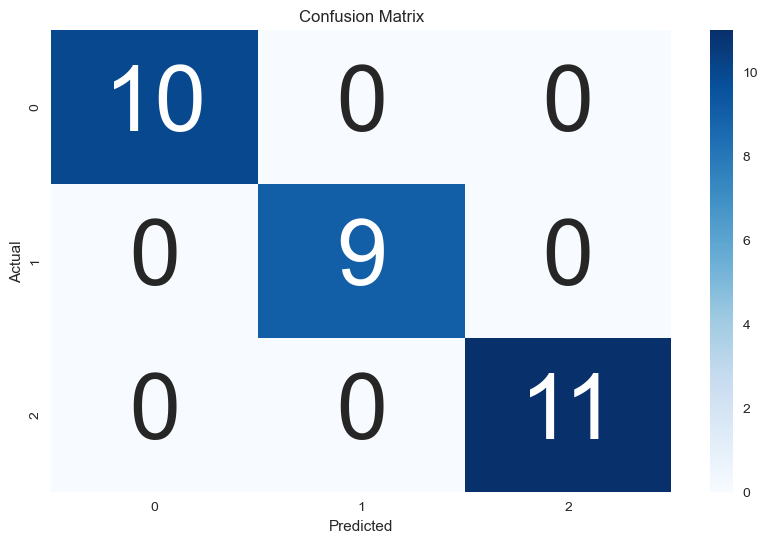

In [55]:
# Plotting Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues');

# Adding labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [56]:
# Unseen measurements for prediction
measurement = [
    [4.5, 2.3, 1.4, 1.5],
    [2.1, 3.1, 4.1, 3.2],
    [5.3, 5.4, 1.2, 1.5]
]

pred = knn.predict(measurement)

# Printing predicted species for each measurement
print("Species Prediction: {}".format(pred))

Species Prediction: ['Iris-setosa' 'Iris-versicolor' 'Iris-setosa']


C:\Users\FARAZ\Desktop\internship\oasis\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
